In [1]:
import pandas as pd  #pandas for reading, cleaning data
import numpy as np   #for mathematical operations, arrays
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns #for advanced plots and better visualization
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,r2_score
import statsmodels.api as sm #for statistical tests, QQplots,

In [22]:
column_names = ['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg',
                'Thalach', 'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target']
df=pd.read_csv("heart.csv",header=None, names=column_names)


In [23]:
print(df.head())

    Age  Sex   Cp  Trestbps   Chol  Fbs  Restecg  Thalach  Exang  Oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   Slope   Ca Thal  Target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [24]:
print(df.isnull().sum())

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64


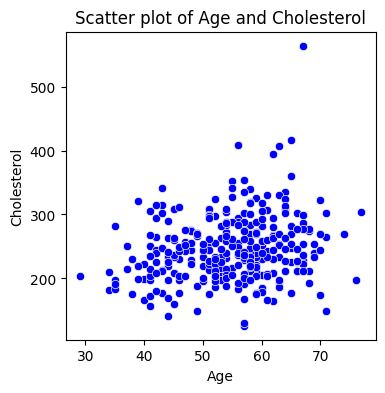

In [43]:
x=df['Age']
y=df['Chol']
plt.figure(figsize=(4,4))
sns.scatterplot(x=x,y=y,data=df,color='blue',marker='o')
plt.title("Scatter plot of Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

In [40]:
#plotting regession line using manual calculation
x_mean=np.mean(x)
y_mean=np.mean(y)
beta1=np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
beta0=y_mean-beta1*x_mean
print("The intercept and slope",beta0,beta1)

The intercept and slope 181.5325326881229 1.1969471109729466


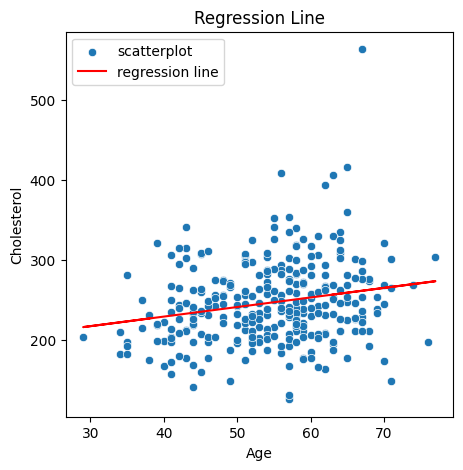

In [47]:
#plotting above values
plt.figure(figsize=(5,5))
sns.scatterplot(x=x,y=y,label='scatterplot')
plt.plot(x,beta0+beta1*x,color='red',label='regression line')
plt.title('Regression Line')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()

In [48]:
#plotting with using linear regression
#before doing that when we are doing manually we dont need 2d matrix
#But here we require the 2d matrix so we will reshape them
x_reshaped=x.values.reshape(-1,1)
model=LinearRegression()
model.fit(x_reshaped,y)
print("Intercept (β0) =", model.intercept_)
print("Slope (β1) =", model.coef_[0])

Intercept (β0) = 181.5325326881229
Slope (β1) = 1.1969471109729466


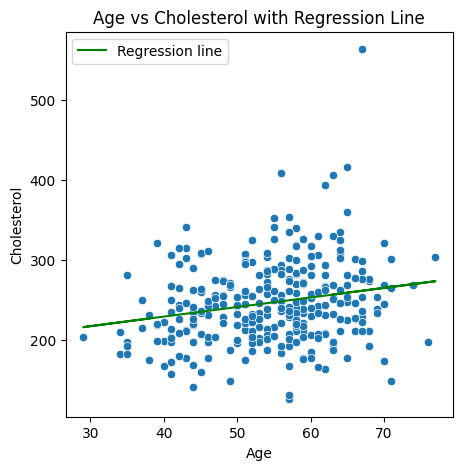

In [49]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=x, y=y)
plt.plot(x, model.predict(x_reshaped), color='green', label='Regression line')
plt.title("Age vs Cholesterol with Regression Line")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()

In [51]:
y_pred = model.predict(x_reshaped)   # predicted values
residuals = y - y_pred
print(residuals)

0      -23.940201
1       24.272011
2      -32.727989
3       24.180424
4      -26.607364
          ...    
298     28.604847
299    -69.924936
300   -118.758518
301    -13.758518
302    -52.016523
Name: Chol, Length: 303, dtype: float64


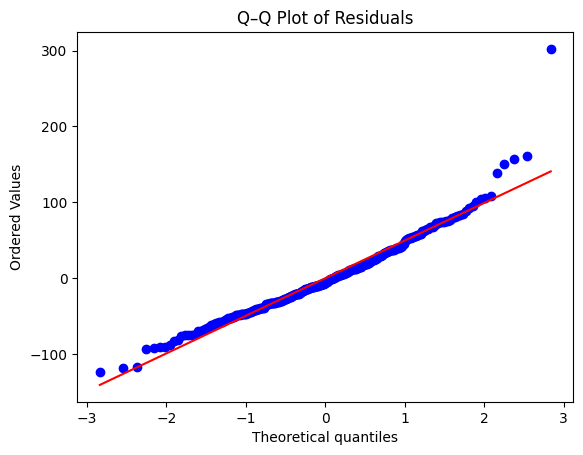

In [53]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

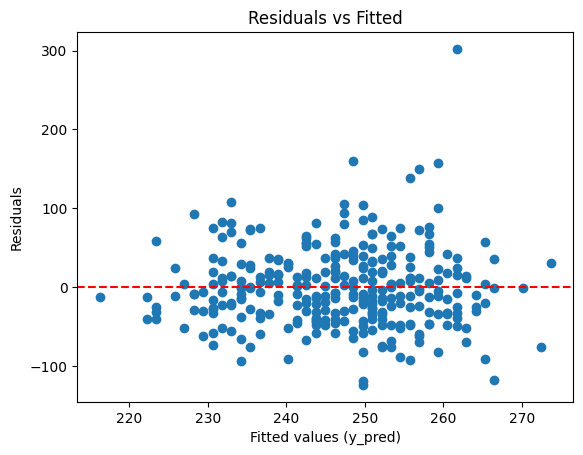

In [54]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted values (y_pred)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show(

In [55]:

r2 = r2_score(y, y_pred)
print("R² Score:", r2)


R² Score: 0.043660215310833306


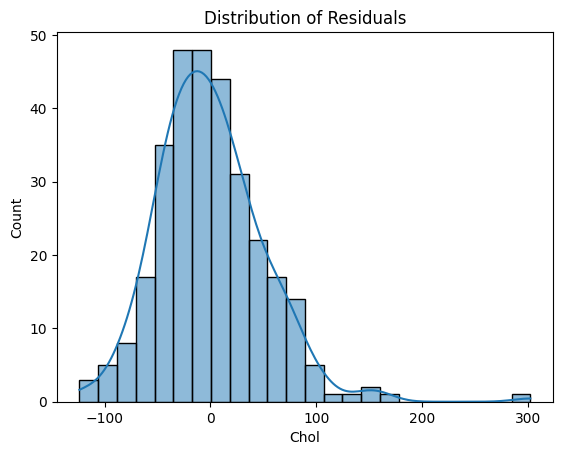

In [57]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

In [58]:
SSE = np.sum(residuals**2)

# n = number of observations
n = len(y)

# k = number of predictors (here only Age → so k=1)
k = 1

# Standard Error of Regression
SE = np.sqrt(SSE / (n - k - 1))
print("Standard Error of Regression:", SE)

Standard Error of Regression: 50.71804762038771


In [60]:
x = df.iloc[:, :-1]   # take all rows, all columns except the last
y = df.iloc[:, -1]    # take all rows, only the last column


In [63]:
#logistic regression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [67]:
print((x_train == '?').sum())  # Shows how many '?' are in each column


Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          2
Thal        2
dtype: int64


In [78]:

x_train = x_train.replace('?', np.nan)
x_test = x_test.replace('?', np.nan)


In [82]:
x_train = x_train.apply(pd.to_numeric)
x_test = x_test.apply(pd.to_numeric)

# Use train mean to avoid data leakage
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_train.mean())


In [87]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

log_model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=5000)

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Make predictions on the test set
y_pred = log_model.predict(x_test_scaled)
 # probability for positive class

# 2. Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 4. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.5819672131147541
Confusion Matrix:
 [[57  2  3  1  1]
 [ 8  5  5  5  0]
 [ 1  5  3  5  3]
 [ 1  4  1  6  2]
 [ 1  0  0  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.31      0.22      0.26        23
           2       0.25      0.18      0.21        17
           3       0.30      0.43      0.35        14
           4       0.00      0.00      0.00         4

    accuracy                           0.58       122
   macro avg       0.34      0.34      0.34       122
weighted avg       0.57      0.58      0.57       122



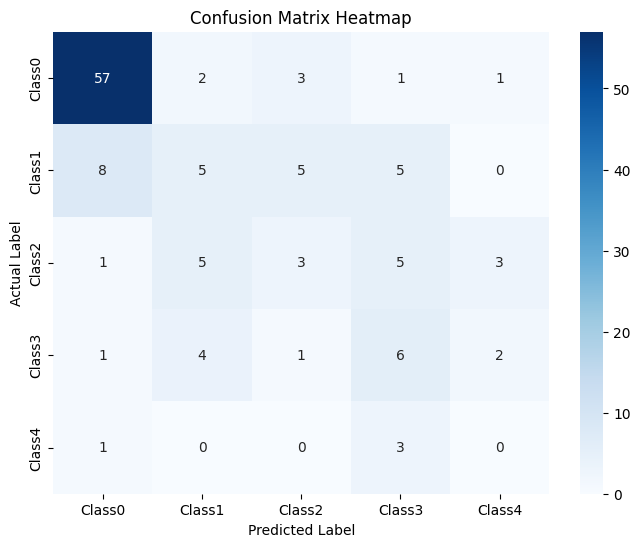

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Your confusion matrix
cm = [[57, 2, 3, 1, 1],
      [8, 5, 5, 5, 0],
      [1, 5, 3, 5, 3],
      [1, 4, 1, 6, 2],
      [1, 0, 0, 3, 0]]

# If you have class names, you can replace these with actual labels
class_names = ['Class0', 'Class1', 'Class2', 'Class3', 'Class4']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
